In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Cargar los datos en un DataFrame
df = pd.read_csv('ds_salaries.csv')

<Axes: >

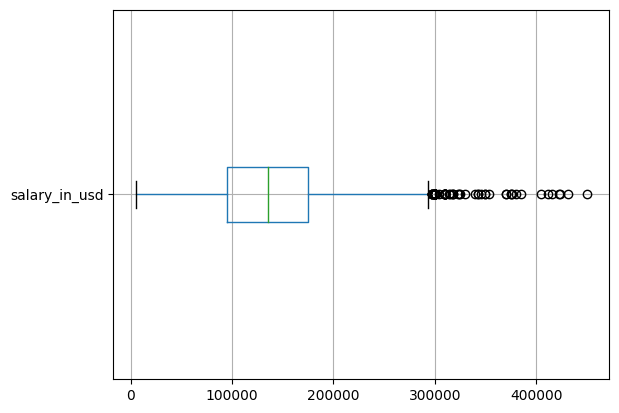

In [3]:
df.boxplot(column='salary_in_usd', vert = False)

In [4]:
fig, ax = plt.subplots()
ax.boxplot(df['salary_in_usd'], whis=1.5)
outliers = [flier.get_ydata() for flier in ax.lines if flier.get_ydata().size > 0]

print('Valores atípicos del salario en dólares:')
for val in outliers:
    print(val)

Valores atípicos del salario en dólares:
[ 95000.  95000. 175000. 175000.  95000.]
[95000.  5132.]
[175000. 293000.]
[5132 5132]
[293000 293000]
[135000. 135000.]
[342810 309400 300000 342300 318300 309400 300000 329500 304000 353200
 297300 317070 423834 376080 299500 297300 299500 340000 310000 310000
 300240 300240 370000 323300 299500 310000 375000 318300 385000 370000
 314100 350000 310000 300000 299500 300000 300000 297300 297300 310000
 310000 430967 300000 310000 299500 300000 375000 350000 315000 300000
 345600 300000 297500 300000 300000 324000 405000 380000 450000 416000
 325000 423000 412000]


In [5]:
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data_filtered = df[(df['salary_in_usd'] > lower_bound) & (df['salary_in_usd'] < upper_bound)]

# Crear el histograma
plt.hist(data_filtered['salary_in_usd'], bins=20)
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.title('Histograma del salario en USD sin valores atípicos')

Text(0.5, 1.0, 'Histograma del salario en USD sin valores atípicos')

In [6]:
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_no_outliers = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

bins = range(0, int(df_no_outliers['salary_in_usd'].max()), 20000)
plt.hist(df_no_outliers['salary_in_usd'], bins=bins)

plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.title('Histograma de Salarios en USD (Sin Valores Atípicos)')

Text(0.5, 1.0, 'Histograma de Salarios en USD (Sin Valores Atípicos)')

In [7]:
# filtrar para trabajadores en Estados Unidos y nivel de experiencia senior
senior_us_salaries_df = df[(df['employee_residence'] == 'US') & (df['experience_level'] == 'SE')]
# seleccionar solo la columna de salario en dólares
salaries_usd = senior_us_salaries_df['salary_in_usd']

# calcular la media
mean_salary = salaries_usd.mean()
print("El salario promedio para trabajadores senior en Estados Unidos es: ${:,.2f}".format(mean_salary))

# calcular la mediana
median_salary = salaries_usd.median()

# calcular la desviación estándar
std_dev = salaries_usd.std()

# calcular el rango intercuartil
q1 = salaries_usd.quantile(0.25)
q3 = salaries_usd.quantile(0.75)
iqr = q3 - q1

print("El salario mediano para trabajadores senior en Estados Unidos es: ${:,.2f}".format(median_salary))
print("La desviación estándar del salario en dólares para trabajadores senior en Estados Unidos es: ${:,.2f}".format(std_dev))
print("El rango intercuartil del salario en dólares para trabajadores senior en Estados Unidos es: ${:,.2f}".format(iqr))

El salario promedio para trabajadores senior en Estados Unidos es: $158,973.19
El salario mediano para trabajadores senior en Estados Unidos es: $150,000.00
La desviación estándar del salario en dólares para trabajadores senior en Estados Unidos es: $52,866.29
El rango intercuartil del salario en dólares para trabajadores senior en Estados Unidos es: $67,300.00


In [8]:
# filtrar los datos por employee_residence y experience_level
df_filtered = df[(df['employee_residence'] == 'US') & (df['experience_level'] == 'SE')]

# contar cuántos SE hay
count_SE = len(df_filtered)

print(count_SE)

2253


In [9]:
country_counts = df['employee_residence'].value_counts()
top_countries = country_counts[country_counts >= 20]
top_10_countries = top_countries.head(10)
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xticks(rotation=90)
plt.xlabel('Países')
plt.ylabel('Frecuencia de empleados')
plt.title('Top 10 países con mayor cantidad de residentes de los empleados')

Text(0.5, 1.0, 'Top 10 países con mayor cantidad de residentes de los empleados')

In [10]:
df_filtered = df[df['experience_level'].isin(['SE', 'MI', 'EN', 'EX'])]
grouped = df_filtered.groupby(['employee_residence', 'experience_level']).size().reset_index(name='count')
top_countries = grouped.groupby('employee_residence').sum().sort_values('count', ascending=False).head(5).index.tolist()
grouped = grouped[grouped['employee_residence'].isin(top_countries)]
sns.set(style='whitegrid')

sns.barplot(data=grouped, x='employee_residence', y='count', hue='experience_level', order=top_countries)

plt.title('Cantidad de empleados por país y experiencia laboral')
plt.xlabel('País')
plt.ylabel('frecuencia de empleados')
plt.legend(title='Experiencia laboral')

In [11]:
pivot_top_paises = pd.pivot_table(grouped, values='count', index='employee_residence', columns='experience_level', fill_value=0)
pivot_top_paises.index.name = "Paises donde viven los empleados"
pivot_top_paises['Total'] = pivot_top_paises.sum(axis=1)
pivot_top_paises_sorted = pivot_top_paises.sort_values(by='Total', ascending=False)
pivot_top_paises_sorted.columns.name = 'Nivel de experiencia'
pivot_top_paises_sorted.head()

Nivel de experiencia,EN,EX,MI,SE,Total
Paises donde viven los empleados,,,,,
US,173,97,481,2253,3004
GB,13,2,117,35,167
CA,7,3,15,60,85
ES,5,1,22,52,80
IN,26,2,32,11,71


In [12]:
mode_job_title = df['job_title'].mode()[0]
print(mode_job_title)

Data Engineer


In [13]:
# calcular la moda del job_title y el recuento de ocurrencias
mode_title = df['job_title'].mode()[0]
count_mode = df['job_title'].value_counts()[mode_title]

# imprimir los resultados
print(f"La moda del job_title es '{mode_title}' con un recuento de {count_mode} ocurrencias.")

La moda del job_title es 'Data Engineer' con un recuento de 1040 ocurrencias.


In [14]:
# Filtrar por residencia en Estados Unidos
us_data = df[df['employee_residence'] == 'US']

# Seleccionar la columna de salario en dólares
us_salary = us_data['salary_in_usd']
print(us_salary)

1        30000
2        25500
5       222200
6       136000
9       147100
         ...  
3749    165000
3750    412000
3751    151000
3752    105000
3753    100000
Name: salary_in_usd, Length: 3004, dtype: int64


In [15]:
# Filtramos los registros que corresponden a empleados que residan en Estados Unidos
us_df = df[df['employee_residence'] == 'US']
# Agrupamos los registros por el experience_level y calculamos la mediana del salario en dólares para cada grupo
mediana_por_experience_level = us_df.groupby('experience_level')['salary_in_usd'].median()

print(mediana_por_experience_level)

experience_level
EN     93000.0
EX    200000.0
MI    125000.0
SE    150000.0
Name: salary_in_usd, dtype: float64


In [16]:
# Crear figura y ejes
fig, ax = plt.subplots()

# Crear gráfica de barras
ax.bar(mediana_por_experience_level.index, mediana_por_experience_level)

# Personalizar etiquetas y títulos
ax.set_xlabel('Experience Level')
ax.set_ylabel('Salario (USD)')
ax.set_title('Mediana Salario por Experience Level en US')

Text(0.5, 1.0, 'Mediana Salario por Experience Level en US')

In [17]:
# Filtrar por employee_residence sea US
us_data = df[df["employee_residence"] == "US"]

# Calcular la media del salario en USD por experience_level
salary_mean_by_exp_level = us_data.groupby("experience_level")["salary_in_usd"].mean()

salary_mean_by_exp_level.head()

experience_level
EN    105478.017341
EX    208037.742268
MI    129903.031185
SE    158973.194407
Name: salary_in_usd, dtype: float64

In [18]:
# Crear gráfico de barras
plt.bar(salary_mean_by_exp_level.index, salary_mean_by_exp_level.values)

# Configurar títulos y etiquetas de los ejes
plt.title("Media del salario en USD por nivel de experiencia en US")
plt.xlabel("Nivel de experiencia")
plt.ylabel("Salario en USD")

Text(0, 0.5, 'Salario en USD')

In [19]:
# Filtrar por employee_residence no sea US
non_us_data = df[df["employee_residence"] != "US"]

# Calcular la media del salario en USD por experience_level
salary_mean_by_exp_level = non_us_data.groupby("experience_level")["salary_in_usd"].mean()

# Crear el gráfico de barras
plt.bar(salary_mean_by_exp_level.index, salary_mean_by_exp_level.values)

# Configurar el título y las etiquetas de los ejes
plt.title("Media del salario en USD por nivel de experiencia (excluyendo US)")
plt.xlabel("Nivel de experiencia")
plt.ylabel("Salario en USD")

Text(0, 0.5, 'Salario en USD')

In [20]:
# filtrar el dataframe original para obtener solo los remote_ratio 0, 50 y 100
df_filtered = df[df['remote_ratio'].isin([0, 50, 100])]

# agrupar por experience_level y remote_ratio y contar cuántos trabajan en cada combinación
grouped = df_filtered.groupby(['experience_level', 'remote_ratio']).size().unstack()

# crear el gráfico de barras agrupados
fig, ax = plt.subplots()
index = np.arange(len(grouped.index))
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(index, grouped[0], bar_width, alpha=opacity, color='b', label='No trabajo remoto 0%')
rects2 = ax.bar(index + bar_width, grouped[50], bar_width, alpha=opacity, color='g', label='Hibrido 50%')
rects3 = ax.bar(index + 2*bar_width, grouped[100], bar_width, alpha=opacity, color='r', label='Trabajo remoto 100%')

ax.set_xlabel('Nivel de experiencia')
ax.set_ylabel('Número de empleados')
ax.set_title('Número de empleados por experiencia y remote ratio, en todos los paises.')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(grouped.index)
ax.legend()

fig.tight_layout()

In [21]:
# Calcula la mediana
median_salary = df['salary_in_usd'].median()

# Calcula la media aritmética
mean_salary = df['salary_in_usd'].mean()

mode_residence = df['employee_residence'].mode()

print("Mediana del salario en dolares: ",median_salary)
print("Salario en dolares la media aritmetica:", mean_salary)
print("Residencia en moda",mode_residence)

Mediana del salario en dolares:  135000.0
Salario en dolares la media aritmetica: 137570.38988015978
Residencia en moda 0    US
Name: employee_residence, dtype: object


In [22]:
freq_ex_levels = df['experience_level'].value_counts()
# Creamos un DataFrame con los valores de freq_ex_levels
df_freq_ex_levels = pd.DataFrame({'Nivel de experiencia': freq_ex_levels.index, 'Frecuencia': freq_ex_levels.values})

# Creamos la tabla dinámica
pivot_table = pd.pivot_table(df_freq_ex_levels, values='Frecuencia', index='Nivel de experiencia')

# Mostramos la tabla dinámica
pivot_table.head()

,Frecuencia
Nivel de experiencia,
EN,320
EX,114
MI,805
SE,2516


In [23]:
# Calcular la mediana y media aritmética de los salarios en USD para los datos con experience_level == 'EX'
median_salary_EX = df['salary_in_usd'].median()
mean_salary_EX = df['salary_in_usd'].mean()

# Imprimir los resultados
print("Mediana de salarios para experiencia nivel EX: USD", median_salary_EX)
print("Media de salarios para experiencia nivel EX: USD", mean_salary_EX)
print(mean_salary_EX - median_salary_EX)

Mediana de salarios para experiencia nivel EX: USD 135000.0
Media de salarios para experiencia nivel EX: USD 137570.38988015978
2570.3898801597825


In [24]:
# Diccionario de códigos ISO 2 para países europeos
european_countries = {'AL': 'EU', 'AD': 'EU', 'AT': 'EU', 'BY': 'EU', 'BE': 'EU', 'BA': 'EU', 'BG': 'EU', 'HR': 'EU', 'CY': 'EU', 'CZ': 'EU', 'DK': 'EU', 'EE': 'EU', 'FO': 'EU', 'FI': 'EU', 'FR': 'EU', 'DE': 'EU', 'GI': 'EU', 'GR': 'EU', 'HU': 'EU', 'IS': 'EU', 'IE': 'EU', 'IM': 'EU', 'IT': 'EU', 'RS': 'EU', 'LV': 'EU', 'LI': 'EU', 'LT': 'EU', 'LU': 'EU', 'MK': 'EU', 'MT': 'EU', 'MD': 'EU', 'MC': 'EU', 'ME': 'EU', 'NL': 'EU', 'NO': 'EU', 'PL': 'EU', 'PT': 'EU', 'RO': 'EU', 'RU': 'EU', 'SM': 'EU', 'RS': 'EU', 'SK': 'EU', 'SI': 'EU', 'ES': 'EU', 'SE': 'EU', 'CH': 'EU', 'UA': 'EU', 'GB': 'EU'}

# Agregamos una nueva columna de clasificación de países
df['country_group'] = df['employee_residence'].apply(lambda x: european_countries.get(x, 'Otros') if x != 'US' else 'US')

# Contamos la frecuencia de las categorías y creamos un gráfico de torta
freq = df['country_group'].value_counts()
freq.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0.1, 0, 0], labels=None)
plt.legend(labels=freq.index, loc='upper left')

In [25]:
# Definir los datos
sizes = [469, 3099, 187]
labels = ['Europa', 'América del Norte', 'Otros']

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear el gráfico de torta
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)


([<matplotlib.patches.Wedge at 0x1bc9e0bb750>,
 [Text(-0.4206329078116555, 1.0163995065258107, 'Europa'),
  Text(0.2571255296420056, -1.0695262792499856, 'América del Norte'),
  Text(0.17139601585285208, 1.0865649569858993, 'Otros')],
 [Text(-0.22943613153363027, 0.5543997308322604, '12.5%'),
  Text(0.14025028889563937, -0.5833779704999921, '82.5%'),
  Text(0.0934887359197375, 0.5926717947195813, '5.0%')])

In [26]:
# filtrar el dataframe original para obtener solo los remote_ratio 0, 50 y 100
df_filtered = df.loc[df['employee_residence'] == 'US'].loc[df['remote_ratio'].isin([0, 50, 100])]

# agrupar por experience_level y remote_ratio y contar cuántos trabajan en cada combinación
grouped = df_filtered.groupby(['experience_level', 'remote_ratio']).size().unstack()

# crear el gráfico de barras agrupados
fig, ax = plt.subplots()
index = np.arange(len(grouped.index))
bar_width = 0.25
opacity = 0.8

rects1 = ax.bar(index, grouped[0], bar_width, alpha=opacity, color='b', label='No trabajo remoto 0%')
rects2 = ax.bar(index + bar_width, grouped[50], bar_width, alpha=opacity, color='g', label='Hibrido 50%')
rects3 = ax.bar(index + 2*bar_width, grouped[100], bar_width, alpha=opacity, color='r', label='Trabajo remoto 100%')

ax.set_xlabel('Nivel de experiencia')
ax.set_ylabel('Número de empleados')
ax.set_title('Número de empleados por experiencia y remote ratio, en USA.')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(grouped.index)
ax.legend()

fig.tight_layout()

In [27]:
grouped.index.name = "Experiencia de nivel"
grouped.columns.name = "Trabajo remoto en USA."
grouped = grouped.fillna("-")
grouped

Trabajo remoto en USA.,0,50,100
Experiencia de nivel,,,
EN,89.0,15.0,69.0
EX,49.0,-,48.0
MI,286.0,12.0,183.0
SE,1243.0,8.0,1002.0


In [28]:
def columns_data_to_array(archive, column=0, limit=100):
    selected_column = archive.columns[column]
    ls = []
    l = 1
    for index, row in archive.iterrows():
        if l <= limit:
            val = row[selected_column]
            ls.append(val)
            l += 1
        else:
            break

    return ls

def gini_coefficient(values):
    # Ordenar los valores de forma ascendente
    sorted_values = sorted(values)
    n = len(values)

    # Calcular la suma acumulada de las frecuencias relativas
    cumulative_sum = sum((i + 1) * val for i, val in enumerate(sorted_values))

    # Calcular el coeficiente de Gini
    mean = sum(sorted_values) / n
    gini = (2 * cumulative_sum) / (n * sum(sorted_values)) - (n + 1) / n

    return gini

In [29]:
num_us_residents = len(df[df['employee_residence'] == 'US'])
print("Cantidad de empleados con residencia en Estados Unidos:", num_us_residents)


Cantidad de empleados con residencia en Estados Unidos: 3004
